# RNS Vectorization timing

This notebook parse `Result.csv`, output of `timing.c`.

You may need to install the json module:
```shell
pip install json
```

In [11]:
pip install matplotlib

     |████████████████████████████████| 10.3 MB 361 kB/s eta 0:00:01
     |████████████████████████████████| 1.2 MB 11.4 MB/s eta 0:00:01
     |████████████████████████████████| 67 kB 509 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [44]:
import json
import matplotlib.pyplot as plt
f = open("Results.json", "r")
data = json.loads(f.read())

<BarContainer object of 2 artists>

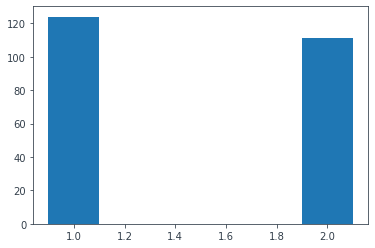

In [45]:
def pick(data: dict, operation: str, mode: str, measure: str):
    res = []
    for m in data[operation][mode]:
        res.append(m[measure])
    return min(res)
        
pick(data, "addition", "sequential", "Cycles")
plt.bar([1, 2], [pick(data, "multiplication", "sequential", "Cycles"), pick(data, "multiplication", "parallel", "Cycles")], width=0.2)

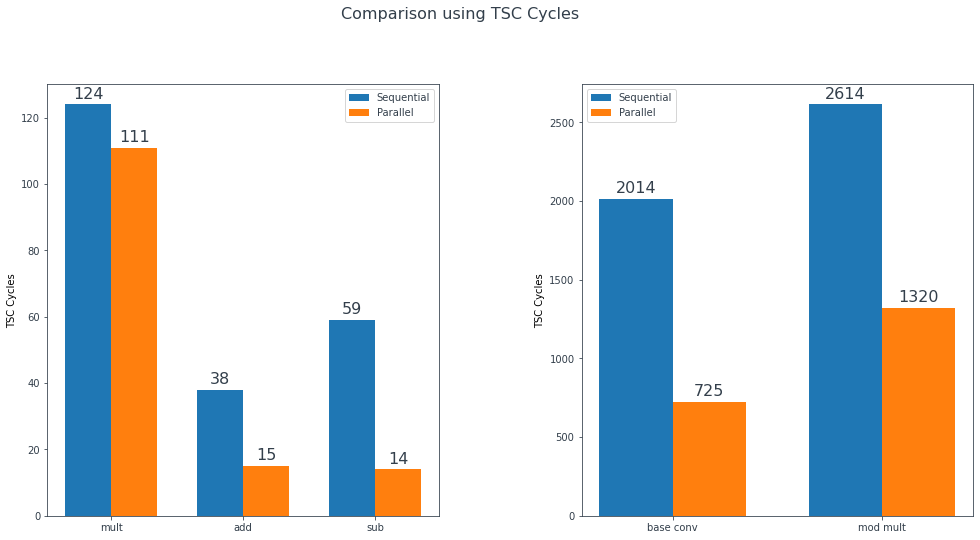

In [83]:
import matplotlib.pyplot as plt
import numpy as np


labels = ['mult', 'add', 'sub', "base conv", "mod mult"]
sequential = [pick(data, op, "sequential", "Cycles") for op in ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication"]]
parallel = [pick(data, op, "parallel", "Cycles") for op in ["multiplication", "addition", "substraction", "base_conversion", "modular_multiplication"]]

x = np.arange(3)  # the label locations
x1 = np.arange(2)
width = 0.35  # the width of the bars

fig, (ax1, ax2) = plt.subplots(1, 2)
rects1 = ax1.bar(x - width/2, sequential[:3], width, label='Sequential')
rects2 = ax1.bar(x + width/2, parallel[:3], width, label='Parallel')

rects3 = ax2.bar(x1 - width/2, sequential[3:], width, label='Sequential')
rects4 = ax2.bar(x1 + width/2, parallel[3:], width, label='Parallel')

# Add some text for labels, title and custom x-axis tick labels, etc.
fig.suptitle('Comparison using TSC Cycles', fontsize=16)

ax1.set_ylabel('TSC Cycles')
ax1.set_xticks(x)
ax1.set_xticklabels(labels[:3])
ax1.legend()

ax2.set_ylabel('TSC Cycles')
ax2.set_xticks(x1)
ax2.set_xticklabels(labels[3:])
ax2.legend()

ax1.bar_label(rects1, padding=3, fontsize=16)
ax1.bar_label(rects2, padding=3, fontsize=16)

ax2.bar_label(rects3, padding=3, fontsize=16)
ax2.bar_label(rects4, padding=3, fontsize=16)

fig.tight_layout()
fig.set_size_inches(15,8)

plt.show()